<a href="https://colab.research.google.com/github/sooieese00/environment-trends-Korea/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#실행
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#실행
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/env_capstone/year/merged_2021.csv", encoding = 'utf-8')
df.head()

Title  \
0           [인천광역시육아종합지원센터] (대상) 용감한 환경 구조대_서창꿈별어린이집   
1  🌲환경송 - 지켜줄게, 친구야｜뚝딱뚝딱 미스터부우｜환경특파원｜환경보호 애니메이션｜T...   
2                                      통합환경관리 특성화대학원   
3  &quot;욕설·폭언에 보복인사&quot;…갑질에 우는 환경미화원 / 연합뉴스TV ...   
4  &#39;타는 냄새 안 나요?&#39;...미세먼지·화재 잡는 &#39;환경관리 로...   

                                         Description     Video ID  \
0  '인천사랑 환경사랑「아이사랑 창작동요 경연대회」' - (대상) 용감한 환경 구조대_...  z8jCt55ruyI   
1  환경송 #즐거운환경운동 #환경애니메이션 #Kids #동요 #키즈 구독   뚝딱뚝딱 ...  Rt4hvLOc8ZE   
2                                     통합환경관리 특성화대학원.  RKqNp4OT2Ac   
3  "욕설·폭언에 보복인사"…갑질에 우는 환경미화원 [앵커] 서울 강동구의 환경미화원들...  doWJXMskfyw   
4  [앵커] 코로나19 때문에 밖에서 마스크를 쓰는 게 많이 익숙해졌지만, 탁한 공기는...  s0Kdl0qjPMU   

   Channel Title          Published At  \
0  인천광역시육아종합지원센터  2021-12-21T10:33:10Z   
1    환경캐릭터 미스터부우  2021-01-08T02:14:26Z   
2         한국환경공단  2021-01-05T07:14:57Z   
3         연합뉴스TV  2021-07-28T10:55:29Z   
4            YTN  2021-04-03T00:42:25Z   

                                          Transcript  Year  
0                                  [음악]\n환경 노래\n[음악]  2021  
1                                                NaN  2021  
2  으\n[음악]\n혹시 통합한 경 관리 제도가 무엇인지 아시나요\n흙이 수질 폐기물 ...  2021  
3  서울 강동구의 환경 미 법원 들이 업체 책으로부터 지속적인 갚지 를 당해\n왔다 고...  2021  
4  코나 입으로 마스크를 쓰는 게 많이 익숙해졌지만 탁한 공기는 여전히\n불청객인 되요...  2021

In [ ]:
df = df.drop_duplicates(subset='Video ID', keep='first')

In [ ]:
df = df.drop(columns=['Title', 'Description', 'Video ID', 'Channel Title'])
df.head(10)

Published At                                         Transcript  \
0  2021-12-21T10:33:10Z                                  [음악]\n환경 노래\n[음악]   
1  2021-01-08T02:14:26Z                                                NaN   
2  2021-01-05T07:14:57Z  으\n[음악]\n혹시 통합한 경 관리 제도가 무엇인지 아시나요\n흙이 수질 폐기물 ...   
3  2021-07-28T10:55:29Z  서울 강동구의 환경 미 법원 들이 업체 책으로부터 지속적인 갚지 를 당해\n왔다 고...   
4  2021-04-03T00:42:25Z  코나 입으로 마스크를 쓰는 게 많이 익숙해졌지만 탁한 공기는 여전히\n불청객인 되요...   
5  2021-04-16T09:00:12Z  오늘은 불면증 은 극복하는 힘은 위생 방법 중 꼭 지켜야 할까\n흉 면에 좋은 춤 ...   
6  2021-11-30T01:37:33Z  [음악]\n[음악]\n예 안녕하십니까 KI 환경평가 본부\n김경호입니다\n아 저희 ...   
7  2021-01-07T00:03:46Z  [음악]\n저희 포스텍 수능 기우 연구실에서는 지구 시스템에서 의 물 순환 변동성을...   
8  2021-05-11T06:42:02Z  환경을 어떻게 개선하느냐 하는 방법은 제가 낼 수 있는 해결책은 아니에요.\n이거는...   
9  2021-05-26T23:04:53Z  -(앵커) 자동으로 비눗방울을 만들어내는\n버블건이라는 장난감이 있습니다.\n아이들...   

   Year  
0  2021  
1  2021  
2  2021  
3  2021  
4  2021  
5  2021  
6  2021  
7  2021  
8  2021  
9  2021

In [ ]:

# 'Published At' 열의 값을 날짜까지만 나오도록 변경
df['Published At'] = df['Published At'].str[:10]

# 'Published At' 열을 기준으로 오름차순 정렬
df = df.sort_values(by='Published At', ascending=True).reset_index(drop=True)
df.head()

Published At                                         Transcript  Year
0   2021-01-01  젝시 내 즘에 또 하루가 시작되었습니다\n아빠와 엄마는 일어나 있지만\n되셨어요 배...  2021
1   2021-01-01  안녕하세요 환경이 앞에 깔아 각기 일곱번째 시간입니다\n지난 회에서는 환경에 평가에...  2021
2   2021-01-02  안녕하세요 어디든 학교입니다 모델이며 이런 존립 아저씨 예비 학부모님들의\n위한 영...  2021
3   2021-01-05  으\n[음악]\n혹시 통합한 경 관리 제도가 무엇인지 아시나요\n흙이 수질 폐기물 ...  2021
4   2021-01-05  [음악]\n획일적 으로 환경을 교제하던 낡은 틀에서 벗어나 과 기술 기반의 유연한\...  2021

In [ ]:
#자막 null값 제거
df['Transcript'].isnull().sum()

302

In [ ]:
df= df.dropna(subset=['Transcript'])

In [ ]:
df['Transcript'].isnull().sum()

0

In [ ]:
df.head()

Published At                                         Transcript  Year
0   2021-01-01  젝시 내 즘에 또 하루가 시작되었습니다\n아빠와 엄마는 일어나 있지만\n되셨어요 배...  2021
1   2021-01-01  안녕하세요 환경이 앞에 깔아 각기 일곱번째 시간입니다\n지난 회에서는 환경에 평가에...  2021
2   2021-01-02  안녕하세요 어디든 학교입니다 모델이며 이런 존립 아저씨 예비 학부모님들의\n위한 영...  2021
3   2021-01-05  으\n[음악]\n혹시 통합한 경 관리 제도가 무엇인지 아시나요\n흙이 수질 폐기물 ...  2021
4   2021-01-05  [음악]\n획일적 으로 환경을 교제하던 낡은 틀에서 벗어나 과 기술 기반의 유연한\...  2021

In [ ]:
output_csv_path = '/content/drive/MyDrive/env_capstone/year/2021.csv'  # 실제 파일 경로로 변경
df.to_csv(output_csv_path, index=False)

print(f"Dataframe saved to {output_csv_path}")

Dataframe saved to /content/drive/MyDrive/env_capstone/year/2021.csv


In [ ]:
import glob
import os

input_directory = '/content/drive/MyDrive/env_capstone/year'

# 디렉토리 내 모든 파일을 순회
for filepath in glob.glob(os.path.join(input_directory, "20*.csv")):
    filename = os.path.basename(filepath)
    df = pd.read_csv(filepath, encoding='utf-8')
    data_count = len(df)
    print(f"{filename} 내의 데이터 개수: {data_count}")

2011.csv 내의 데이터 개수: 245
2012.csv 내의 데이터 개수: 325
2013.csv 내의 데이터 개수: 505
2014.csv 내의 데이터 개수: 572
2015.csv 내의 데이터 개수: 568
2016.csv 내의 데이터 개수: 595
2017.csv 내의 데이터 개수: 584
2018.csv 내의 데이터 개수: 713
2019.csv 내의 데이터 개수: 785
2020.csv 내의 데이터 개수: 777
2022.csv 내의 데이터 개수: 658
2023.csv 내의 데이터 개수: 719
2024.csv 내의 데이터 개수: 826
2021.csv 내의 데이터 개수: 712


In [ ]:
for filepath in glob.glob(os.path.join(input_directory, "merged_20*.csv")):
    filename = os.path.basename(filepath)
    df = pd.read_csv(filepath, encoding='utf-8')
    data_count = len(df)
    print(f"{filename} 내의 데이터 개수: {data_count}")

merged_2010.csv 내의 데이터 개수: 315
merged_2011.csv 내의 데이터 개수: 488
merged_2013.csv 내의 데이터 개수: 1158
merged_2014.csv 내의 데이터 개수: 1308
merged_2016.csv 내의 데이터 개수: 1386
merged_2017.csv 내의 데이터 개수: 1350
merged_2019.csv 내의 데이터 개수: 1463
merged_2020.csv 내의 데이터 개수: 985
merged_2022.csv 내의 데이터 개수: 1147
merged_2023.csv 내의 데이터 개수: 1270
merged_2012.csv 내의 데이터 개수: 1098
merged_2024.csv 내의 데이터 개수: 1303
merged_2018.csv 내의 데이터 개수: 1347
merged_2015.csv 내의 데이터 개수: 1296
merged_2021.csv 내의 데이터 개수: 1024


2011.csv 내의 데이터 개수: 245
2012.csv 내의 데이터 개수: 325
2013.csv 내의 데이터 개수: 505
2014.csv 내의 데이터 개수: 572
2015.csv 내의 데이터 개수: 568
2016.csv 내의 데이터 개수: 595
2017.csv 내의 데이터 개수: 584
2018.csv 내의 데이터 개수: 713
2019.csv 내의 데이터 개수: 785
2020.csv 내의 데이터 개수: 777
2022.csv 내의 데이터 개수: 658
2023.csv 내의 데이터 개수: 719
2024.csv 내의 데이터 개수: 826
2021.csv 내의 데이터 개수: 712


<Figure size 1000x600 with 0 Axes>

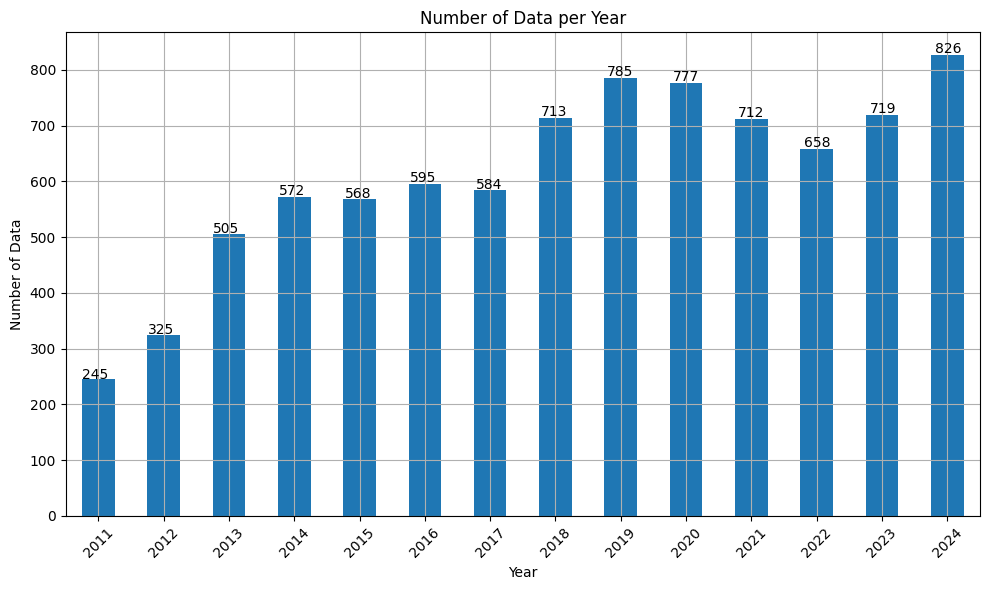

In [ ]:
import matplotlib.pyplot as plt

file_data_counts = []

# "20*.csv" 패턴에 맞는 파일들을 찾음
for filepath in glob.glob(os.path.join(input_directory, "20*.csv")):
    filename = os.path.basename(filepath)
    df = pd.read_csv(filepath, encoding='utf-8')
    data_count = len(df)
    file_data_counts.append((filename[:-4], data_count))
    print(f"{filename} 내의 데이터 개수: {data_count}")

# 파일 이름과 데이터 개수를 데이터프레임으로 변환
df_counts = pd.DataFrame(file_data_counts, columns=['Filename', 'Data Count'])
df_counts = df_counts.sort_values(by='Filename')

# 막대그래프 생성
plt.figure(figsize=(10, 6))
ax = df_counts.plot(kind='bar', x='Filename', y='Data Count', legend=False, figsize=(10, 6), rot=45, grid=True)
plt.xlabel('Year')
plt.ylabel('Number of Data')
plt.title('Number of Data per Year')

# 데이터 레이블 추가
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()

plt.show()

In [ ]:
#실행
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 46.2 MB/s eta 0:00:00


In [ ]:
#실행
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#실행

# 한글 불용어 사전 파일 경로
stopwords_path = '/content/drive/MyDrive/env_capstone/stopword.txt'

# 파일 읽기
with open(stopwords_path, "r", encoding="utf-8") as file:
    stopwords = file.readlines()

# 각 불용어의 좌우 공백과 개행문자 제거
stopwords = [word.strip() for word in stopwords]
# 추가 불용어 (검색어인 '환경'또한 제외하고 분석)
additional_stopwords = [
    '으', '으으', '으으으', '오오오','아아','음악', '박수', '환경', #기본
    '먼저', '아주', '가장', '진짜', '여러', '최대', '제일', '정말', '위해', '통해', '통한', '때문', '대해', '대한',
    '관련','대신', '모두', '모든', '한번', '그냥','크게','대부분','실제',
    '대강', '뭔가','다시', '처럼', '어쨌든', '그대로','직접','아마', #부사
    '올해', '현재', '지난','처음', '지금', '오늘', '하루','이번', '이제', '그다음', '최근', '계속', '당시', '나중', #시간
    '문제', '사람', '상황', '정도', '텍스트', '생각', '고요','가수','동생','일반','형님',
    '부분', '가지', '사실', '여러가지', '얘기', '이야기', '사용','시작', '경우', '내용', '년도', #명사
    '예수', '유다', '언약', '복음', '요셈', '축복', '그리스도', '하나님','주님', '교회', '말씀', #교회
    '보시', '수가', '물이', #잘못된 어간
    '거기', '그것', '그게', '그거',
    '화면', '코드', '클릭', '설치', '크롬', '자바스크립트', '파이썬','클래스', '필드', '설정','버튼', '노션', '옵션' #코딩
]
stopwords.extend(additional_stopwords)


In [ ]:
#여기부터 쭉 실행
# Okt 형태소 분석기 생성
okt = Okt()



# 텍스트 전처리 함수 정의
def preprocessing_transcript(text):
    # 특수 문자 제거
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)
    # 형태소 분석 및 불용어 제거
    tokens = okt.pos(text)
    # 명사와 동사/형용사만 남기기 및 불용어 제거
    tokens = [word for word, pos in tokens if pos in ['Noun'] and word not in stopwords]

    # 토큰을 다시 문자열로 합침
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
# 데이터프레임을 저장할 사전 정의
dataframes = {}
input_directory = '/content/drive/MyDrive/env_capstone/year'
for filepath in glob.glob(os.path.join(input_directory, "20*.csv")):
    filename = os.path.basename(filepath)
    df = pd.read_csv(filepath, encoding='utf-8')
    year = filename[:-4]
    # 전처리 적용
    df['preprocessed_Transcript'] = df['Transcript'].apply(preprocessing_transcript)
    # 데이터프레임을 동적으로 저장
    dataframes[f'df_{year}'] = df

    # 결과를 파일로 저장
    output_filepath = os.path.join(input_directory, f'okt2_{filename}')
    df.to_csv(output_filepath, index=False, encoding='utf-8')

# 결과 확인 (예시로 첫 번째 데이터프레임 출력)
for name, df in dataframes.items():
    print(f'{name} DataFrame:')
    print(df.head())

df_2011 DataFrame:
  Published At                                         Transcript  Year  \
0   2011-01-01  잘 아시죠 왜냐하면\n카메라가 너무 비싸\n2년마다 한 번씩 카메라를\n써보신 마시...  2011   
1   2011-01-10  으\n222\n으\nwe\nwe\nwon\n대한 lpg 산업 환경 적응 의천 0\n...  2011   
2   2011-01-18  틀린말이 송해요 깨진 유리 조각은\n병이든 그릇이든 재활용 봉투가 아닌\n종량제 봉...  2011   
3   2011-01-19  아 아\n아\n으 으\n최근에 그 환경부의 세계 무엇이냐\n그 2011년에는 새로운...  2011   
4   2011-01-25  네 저 줘 으\n쌈 5\n4짜 아 그렇게 서울 다해서\n적신다 네가 안 거에요\n아...  2011   

                             preprocessed_Transcript  
0  아시 카메라 번 카메라 보신 내년 번 카메라 이기 사진 분 옛날 똑 배터리 기준 보...  
1  산업 적응 의천 눌린 보급 활성화 대기 개선 목적 설립 대기 환경오염 범 경유 차량...  
2  송해 유리 조각 병 그릇 재활용 봉투 종량제 봉투 종양 봉투 유리 조각 신문지 헝겁...  
3  환경부 세계 패러다임 환경부 패러다임 잘해야 후 색 색 환경부 넋 셀 부처 환경보호...  
4  쌈 서울 다해 적신 안 거 종 르 쭉 밑 거 오예 친구 개 수 거 독일 수도 무게 ...  
df_2012 DataFrame:
  Published At  Year                                         Transcript  \
0   2012-01-01  2012  아 여러분 정말 반갑습니다 이렇게 어\n수업 시간을 내가 뺏는 거 아닐까\n방해하는...   
1   2012-01-03  2012  y\n생명평화 운

In [ ]:
def processing_tfidf_wordcloud(filepath, preprocessing_function, font_path):
    # CSV 파일 읽기
    df = pd.read_csv(filepath, encoding='utf-8')
    year = os.path.basename(filepath).split('.')[0]


    # null 값 제거
    df.dropna(subset=['preprocessed_Transcript'], inplace=True)

    # TF-IDF 벡터라이저 초기화
    vectorizer = TfidfVectorizer()

    # 텍스트 데이터를 학습 및 변환
    tfidf_matrix = vectorizer.fit_transform(df['preprocessed_Transcript'])

    # 단어와 TF-IDF 점수 매핑
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

    # 워드클라우드 생성
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white',max_words=120).generate_from_frequencies(tfidf_scores)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {year}')
    plt.axis('off')
    plt.show()

    # 워드클라우드를 파일로 저장
    output_filepath = os.path.join(input_directory, f'wordcloud_{year}.png')
    wordcloud.to_file(output_filepath)
    print(f'Word cloud saved to {output_filepath}')

In [ ]:
font_path = '/content/drive/MyDrive/HANCOM GOTHIC REGULAR.TTF'

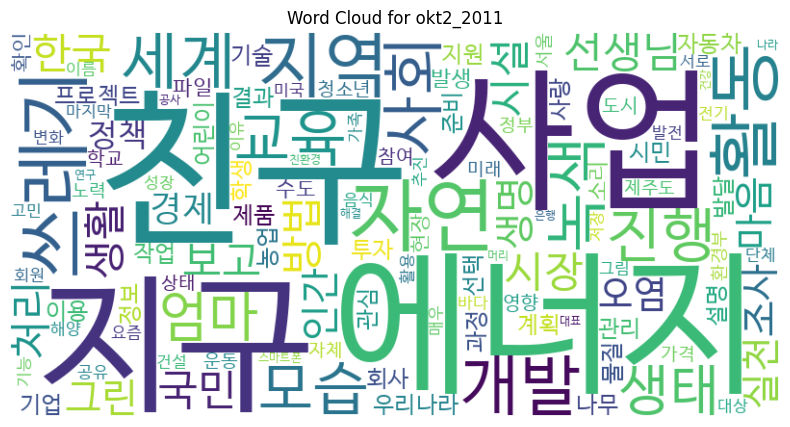

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2011.png


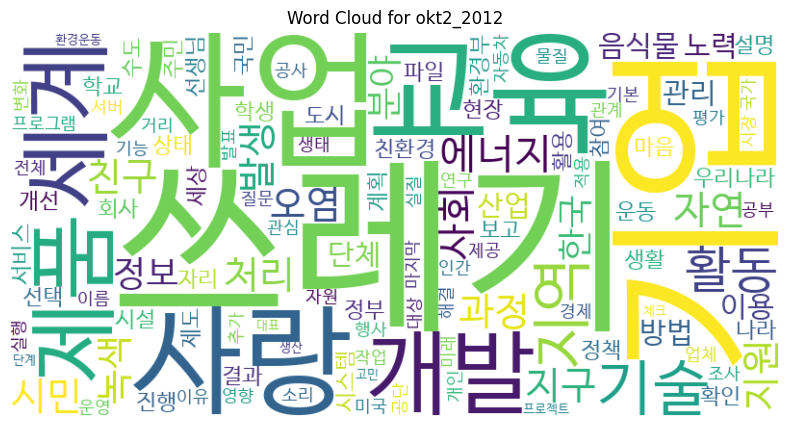

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2012.png


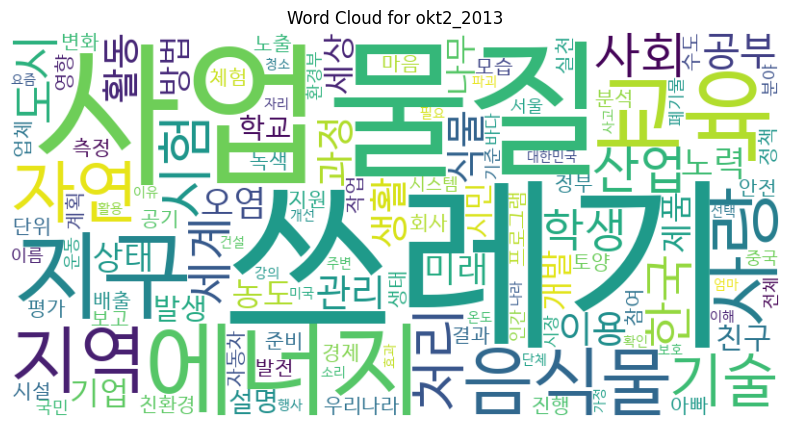

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2013.png


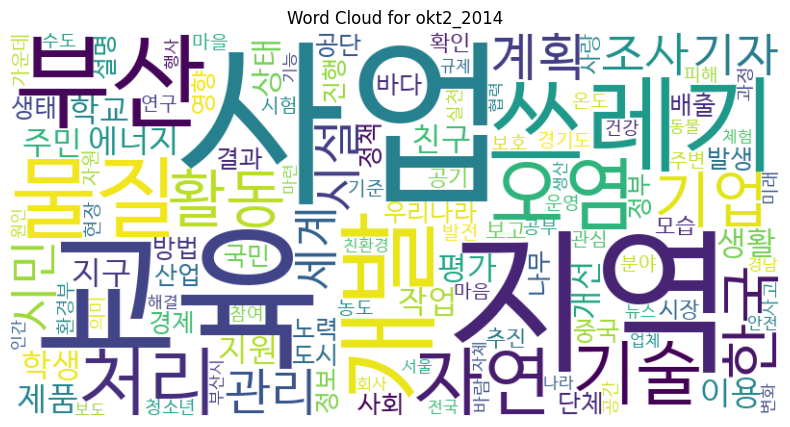

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2014.png


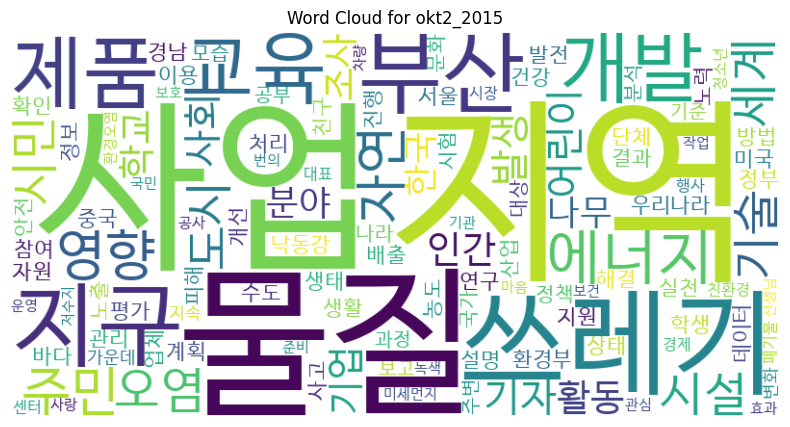

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2015.png


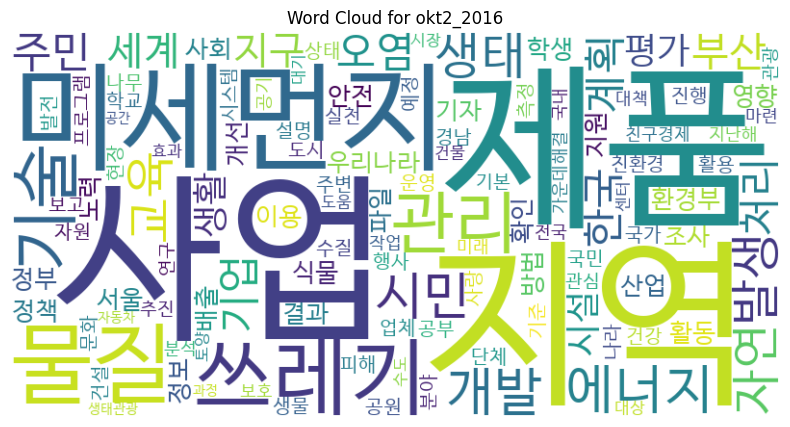

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2016.png


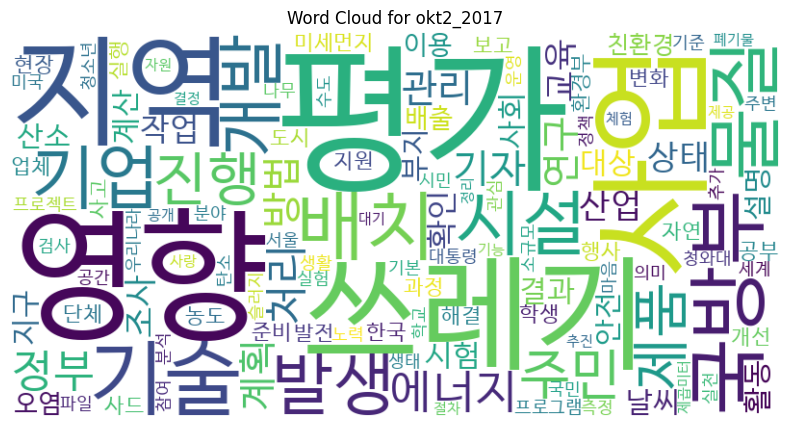

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2017.png


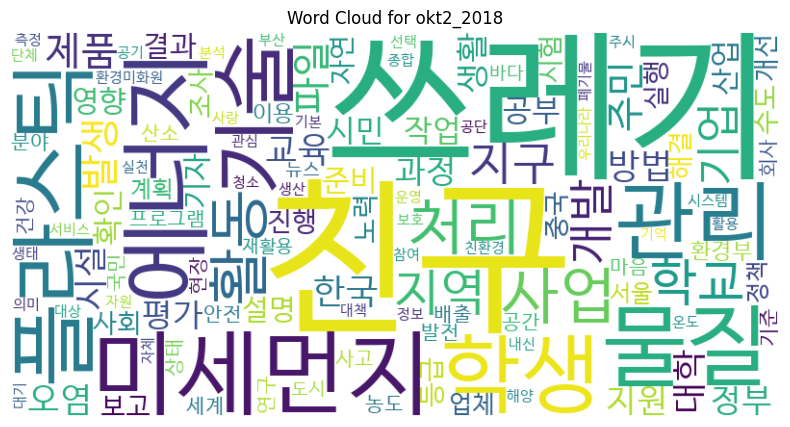

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2018.png


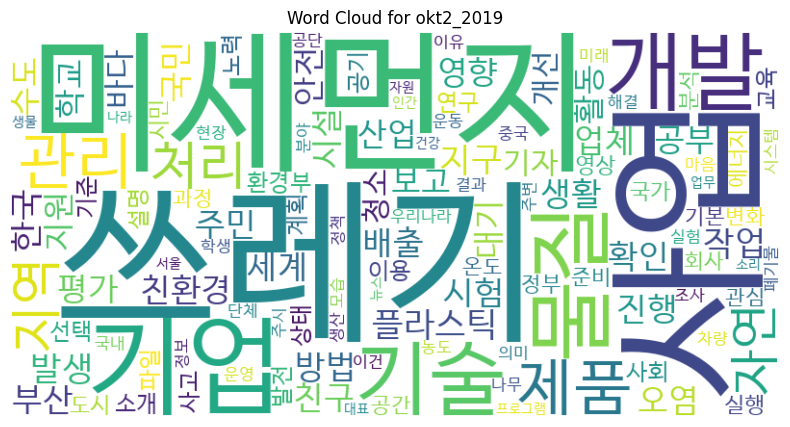

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2019.png


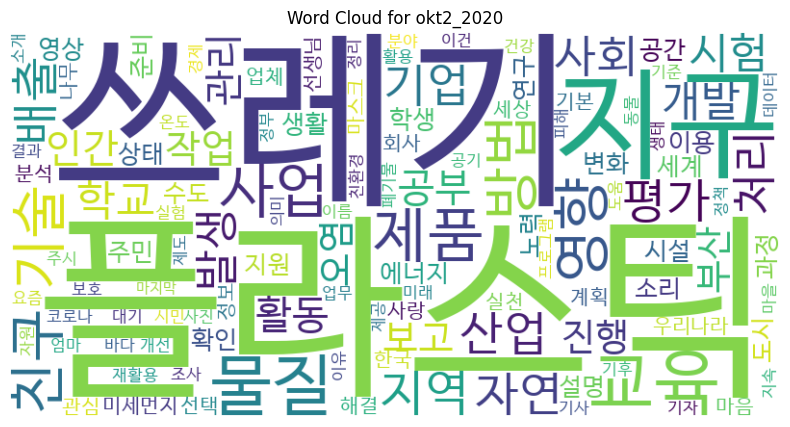

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2020.png


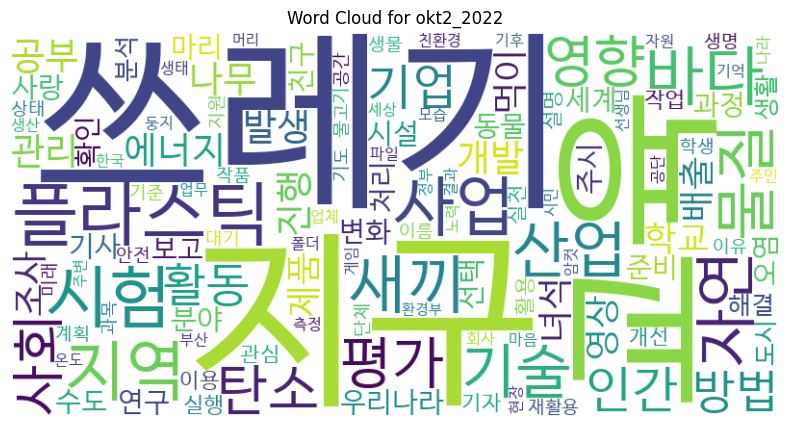

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2022.png


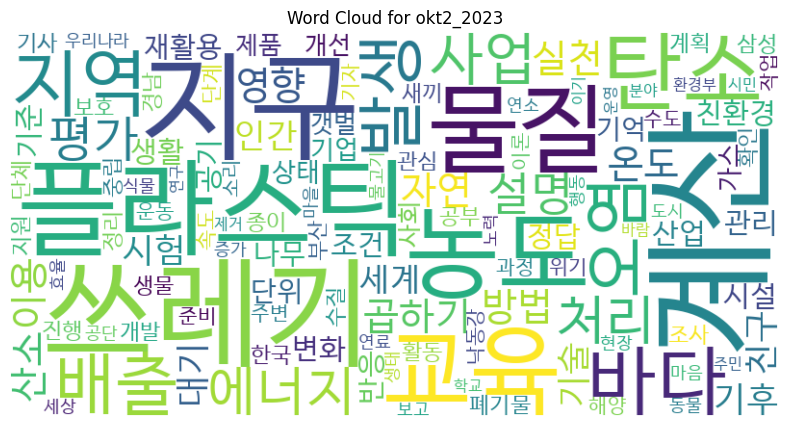

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2023.png


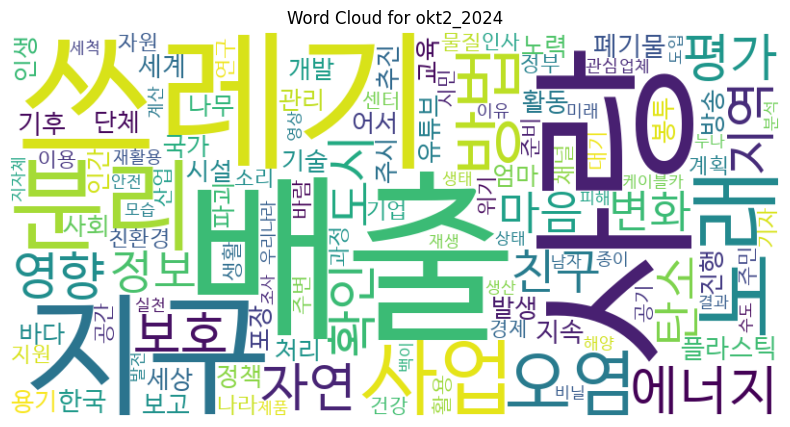

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2024.png


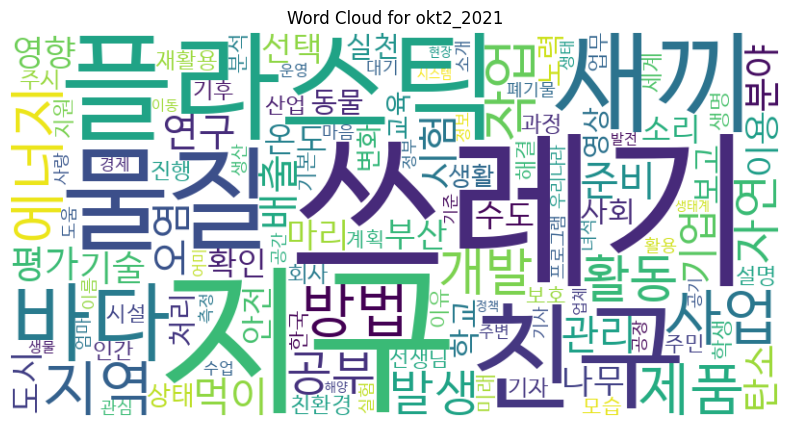

Word cloud saved to /content/drive/MyDrive/env_capstone/year/wordcloud_okt2_2021.png


In [ ]:
for filepath in glob.glob(os.path.join(input_directory, "okt2_20*.csv")):
     processing_tfidf_wordcloud(filepath, preprocessing_transcript, font_path)